# Module 11: Multi-Level Models

## Introduction

As we have seen, models can have more than one parameter. Sometimes, some of the parameters in a model depend on the values of other parameters. If this is the case, the model is hierarchical, and can have multiple levels. These multi-level models can have very great predictive power.

## Learning Outcomes

In this module, you will:

* Use hierarchies to develop more complex probabilistic models

# Readings and Resources

We invite you to further supplement the content in this module with the following recommended texts.

Gelman, A. (2006). Multilevel (Hierarchical) Modeling: What It Can and Cannot Do. *Technometrics*, 48, 432-435. [<a href="http://www.stat.columbia.edu/~gelman/research/published/multi2.pdf">link</a>]

Kruschke, J.K. (2014). Chapter 8: JAGS and Chapter 9: Hierarchical Models. In *Doing Bayesian Analysis: A Tutorial with R, JAGS and Stan.* Academic Press: Boston. [<a href="https://books.google.ca/books?id=FzvLAwAAQBAJ">link</a>]

## Hierarchical models

### What are hierarchical models?

Hierarchical models are defined as mathematical descriptions involving multiple parameters such that the values of some parameters depend on the values of other parameters. Multi-level models are a subclass of these types of mdoels. 

Some examples:

- the batting ability of baseball players
- the probability that a child bought lunch from a school cafeteria
- the amount of radon in a household in all counties of several states

What these have in common is that the data are organized at more than one level. In the school lunch example above, depending on the number of independent variables you are interested in, you might want to use:

1. student
2. class
3. school
4. district

to predict the probability. This allows you to take into account various factors that might introduce errors into your prediction if they are not controlled for.

To illustrate this point, consider a basic linear regression model that predicts income as a function of age. It is then observed that income also varies depending on location. How do we add this into our model? A simple way would be to add an independent categorical variable to account for location, but it would assume that the effect of age would still be the same everywhere. However, because of different local laws, retirement benefits, etc., this is unlikely to be the case. This can be generalized to other predictors than just age.

Specifically: a basic linear regression model might predict that a randomly sampled person in Ottawa might have an income that is \\$20,000 higher than a similar person in Halifax. It also might predict that a 65-year-old might have an income \\$15,000 below a 45-year-old - regardless of location. However, a multi-level model would allow for different regression coefficients for each predictor in each location, meaning that in this example location would be taken into account when making the prediction about income level due to age.

This idea can be expanded when you want to add more variables in a hierarchy, for example, breaking down location into postcode areas within a city.
![hierarch_example.png](attachment:hierarch_example.png "Hierarch example")

Image description: four boxes with text in three rows. The top row has one box labelled 'City' with a vertical arrow pointing to a box below it, labelled 'Postcode'. Next to this box on the second row is another one labelled 'Age'. Both boxes on the second row have vertical arrows pointing below them to the fourth box, labelled 'Income'.
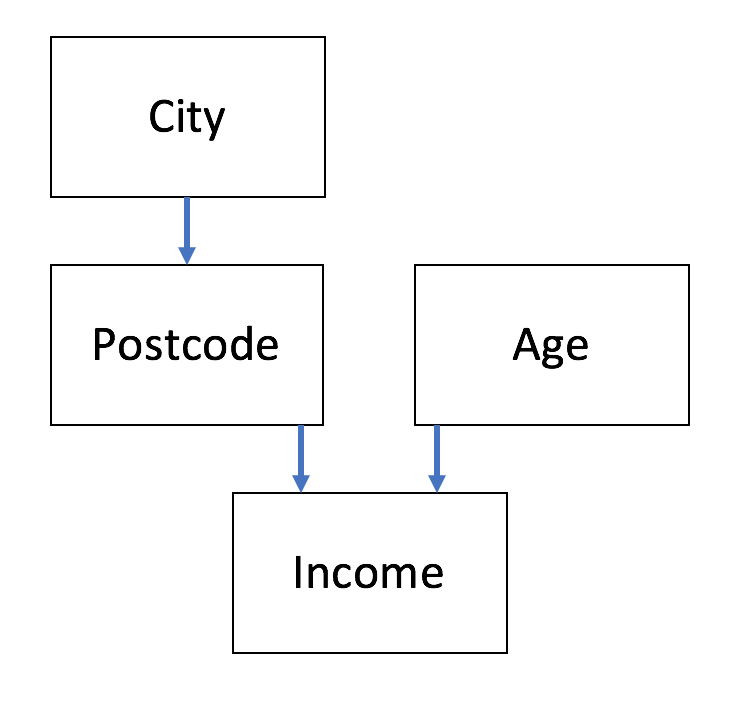

### Hierarchical parameters

For example, we might be interested in the bias of a coin. Normally, we would confidently assert that the probability of getting a head when flipping a coin was 0.5. But what if the factory has a fault in the production process which changes the probability of getting a head? What if they are strange, misshapen, weighted coins?

Let's denote the bias of a particular coin by $\theta$ and the bias of a particular mint by $\omega$. Then, necessarily, $\theta$ depends on $\omega$, and we can measure this dependence using data, $D$ (i.e., we can measure the results of coin flips).

The estimate of each individual parameter is simultaneously informed by the structural dependencies across parameter levels.

i.e.,

$$p(\theta\ , \omega \mid D) \propto p(D\ \mid \theta,\omega)p(\theta,\omega)$$

$$=p(D\ \mid \theta)p(\theta\ \mid \omega)p(\omega)$$

The data depend only on the value of $\theta$ (i.e., when $\theta$ is set, the data are independent of all other parameter values).
- The values of $\theta$ depend on the values of $\omega$
- The model is factored into a chain of dependencies

#### Example: a single coin from a single mint

So let's look at the classic coin toss scenario. We will consider a result of "heads" a "successful" coin toss. Consider trying this out with several coins made by the same mint. What is the probability of success? Let's assume that we don't have any intuition about the probability. How do we decide on the prior distribution?

To begin with we will observe one coin only.

First, what is the *likelihood* that we will obtain a head (H)?

There are only two options, H or T – so the likelihood is drawn from a Bernoulli distribution:

$$y_i \sim \textrm{dbern}(\theta)$$

Ok, now what about the *prior*?

It turns out that the **beta distribution** can be used to model a distribution of unknown probabilities:

$$\theta \sim \textrm{dbeta}(a,b)$$

(If you are curious, there is an excellent blog post <a href="http://varianceexplained.org/statistics/beta_distribution_and_baseball/">here</a> with an intuitive description of why the beta distribution is good for this.)

Graphically, this hierarchical relationship can be shown as follows:

![hierarch_1.png](attachment:hierarch_1.png "hierarch 1")

(source: Kruschke, J.K., "Doing Bayesian Data Analysis", 2nd. ed., 2015, pp. 196)

Image description: three panels. The top panel shows a curve, the word 'beta' and the letters A and B, representing a beta distribution and its parameters. A black vertical arrow to the middle panel shows that this is the distribution that describes $\theta$.

The middle panel shows two vertical bars and the word 'Bernoulli', representing a Bernoulli distribution. Another black vertical arrow to the bottom panel shows that this is the distribution that describes our trial $i$, which informs our data $y_i$ (bottom panel).
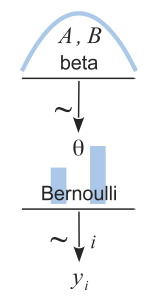

The diagram should be scanned from the bottom up, because the data $y_i$ depends on the likelihood function, which depends on the prior distribution.

The beta density's shape parameters, $A$ and $B$, can be re-expressed in terms of the mode $\omega$ and concentration $\kappa$ of the beta distribution, thus:

$$\theta \sim \textrm{dbeta}(\omega(\kappa-2)+1,(1-\omega)(\kappa-2)+1)$$

where

$$\omega = (A-1)/(A+B-2)$$ and $$\kappa = A + B$$

Remember, in this example, the parameter $\omega$ denotes the **bias** of the *mint*. The bias of the *coin*, $\theta$, necessarily depends on $\omega$. As we expand this example to multiple coins, we will see that the estimate of coin bias depends on the estimate of mint bias, which is influenced by data from all the coins.

Looking at the dependence of $\theta$ on $\omega$, we can see that, for example, as $\omega$ approaches 0.25, $\theta$ also approaches 0.25. The value of $\kappa$ tells us how close $\theta$ is to $\omega$, with larger $\kappa$ meaning that we are more certain about the dependence of $\theta$ on $\omega$. For this example, we will set $\kappa$ to constant, and denote it as $K$.

Basically: the larger the value of $K$, the more consistent the coins from the same mint are, i.e., the more consistently the mint makes coins with $\theta$ close to $\omega$.

Remember that we are interested in estimating the probability of getting a head from a single coin from this mint. That means we need to estimate $\theta$ for this coin, which depends on $\omega$. To determine this, we can flip the same coin several times, which will get us an estimate of the bias of the coin ($\theta$) and also the tendency of the mint ($\omega$).

Recall from Module 9 that the *likelihood* is the probability of data $D$ under hypothesis $H$ (e.g., the probability of getting a head given a particular bias $\theta$), and the *posterior* is the probability of the hypothesis $H$ after we see the data $D$ (e.g., the probability of a particular bias $\theta$ given that we get a head). However, now it's a bit more complicated, because our $\theta$ can vary based on $\omega$.

To infer a posterior distribution over $\omega$ we have to supply a prior distribution. What is our prior distribution for this problem? Let's assume that it's also a beta distribution:

$$p(\omega) = \textrm{beta}(\omega \mid A_\omega, B_\omega)$$

where $A_\omega$ and $B_\omega$ are constants.

From Bayes' rule:

$$p(\theta, \omega | y) = \frac{p(y \mid \theta, \omega)p(\theta, \omega)}{p(y)}$$

However, the likelihood function does not involve $\omega$, so:

$$p(y \mid \theta, \omega) = p(y \mid \theta)$$

Also, because by definition:

$$p(\theta \mid \omega) = \frac{p(\theta, \omega)}{p(\omega)}$$

therefore:

$$p(\theta, \omega \mid y) = \frac{p(y \mid \theta, \omega)p(\theta, \omega)}{p(y)}$$

$$= \frac{p(y \mid \theta)p(\theta \mid \omega)p(\omega)}{p(y)}$$

Note that this final expression now has specific hierarchical meaning because our likelihood function $p(y | \theta)$, dependence of $\theta$ on $\omega$ $p(\theta | \omega)$, and our prior $p(\omega)$ can all be expressed as a hierarchical chain of dependencies among parameters. This is shown graphically below:

![hierarch_2.png](attachment:hierarch_2.png "hierarch single coin")

(source: Kruschke, J.K., "Doing Bayesian Data Analysis", 2nd. ed., 2015, pp. 225)

Image description: four panels. The top panel shows a curve, the word 'beta' and the letters $A_\omega$ and $B_\omega$, representing a beta distribution and its parameters. Black and grey vertical arrows to equations in the second panel shows that this is the distribution that describes $\omega$.

The second panel shows a curve, the word 'beta' and two equations: $\omega(K-2)+1$ and $(1-\omega)(K-2)+1$, with each $\omega$ pointed to by one of the above arrows. [N.B., the grey arrow just means that the $\omega$ it points to is the same dependence as the $\omega$ pointed to by the arrow in black.] A black vertical arrow to the third panel shows that this is the distribution that describes $\theta$.

The third panel shows two vertical bars and the word 'Bernoulli', representing a Bernoulli distribution. Another black vertical arrow to the bottom panel shows that this is the distribution that describes our trial $i$, which informs our data $y_i$ (bottom panel).

The Bernoulli distribution in the bottom panel is just the standard distribution you would expect for a success-failure problem like a coin flip.
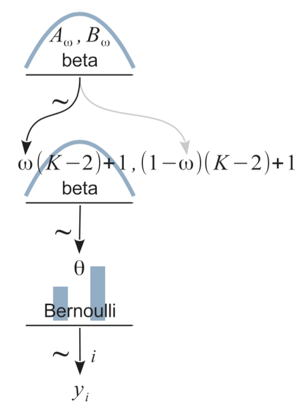

**CODE EXAMPLE**

Note that the following code is adapted from
https://github.com/aloctavodia/Doing_bayesian_data_analysis/blob/master/IPython/Kruschkes_Doing_Bayesian_Data_Analysis_in_PyMC3.ipynb

or 

https://github.com/aloctavodia/Doing_bayesian_data_analysis

In this code sample we explore Bayesian updating of beliefs about the bias of a coin. The prior and posterior distributions indicate probability masses at discrete candidate values of theta.

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

First we have to specify the vector of $\theta$ values.

In [2]:
# theta is the vector (list) of candidate values for the parameter theta.
# n_theta_vals is the number of candidate theta values.

# We set n_theta_vals to 500 here to produce nice looking curves. Experiment!
n_theta_vals = 500

# Now make the vector of theta values
# np.linspace(a, b, c) makes a linearly spaced vector of length c from a to b
theta = np.linspace(1/(n_theta_vals+1), n_theta_vals / (n_theta_vals+1), n_theta_vals)

# p_theta is the vector of prior probabilities on the theta values.
p_theta = np.minimum(theta, 1-theta)  # Makes a triangular distribution of prior beliefs
p_theta = p_theta / np.sum(p_theta)     # Makes sure that beliefs sum to 1

Next we specify the data.

In [3]:
# Try replacing x and y with different integers in the following
# data = np.repeat([1,0], [x, y])
data = np.repeat([1, 0], [3, 9])
n_heads = np.sum(data)
n_tails = len(data) - n_heads

Then we compute the likelihood and posterior.

In [4]:
# Compute the likelihood of the data for each value of theta:
p_data_given_theta = theta**n_heads * (1-theta)**n_tails

# Compute the posterior:
p_data = np.sum(p_data_given_theta * p_theta)
p_theta_given_data = p_data_given_theta * p_theta / p_data   # This is Bayes' rule!

Finally, we plot the results.

In [5]:
# Function to plot results
def plot_results():

    # Plot the results.
    plt.figure(figsize=(12, 11))
    plt.subplots_adjust(hspace=0.7)

    # Plot the prior:
    plt.subplot(3, 1, 1)
    plt.stem(theta, p_theta, markerfmt=' ')
    plt.xlim(0, 1)
    plt.xlabel('$\\theta$')
    plt.ylabel('$P(\\theta)$')
    plt.title('Prior')

    # Plot the likelihood:
    plt.subplot(3, 1, 2)
    plt.stem(theta, p_data_given_theta, markerfmt=' ')
    plt.xlim(0, 1)
    plt.xlabel('$\\theta$')
    plt.ylabel('$P(D|\\theta)$')
    plt.title('Likelihood')
    plt.text(0.6, np.max(p_data_given_theta)/2, 'D = %sH,%sT' % (n_heads, n_tails))

    # Plot the posterior:
    plt.subplot(3, 1, 3)
    plt.stem(theta, p_theta_given_data, markerfmt=' ')
    plt.xlim(0, 1)
    plt.xlabel('$\\theta$')
    plt.ylabel('$P(\\theta|D)$')
    plt.title('Posterior')
    _ = plt.text(0.6, np.max(p_theta_given_data)/2, 'P(D) = %g' % p_data)
    plt.show()

/Users/sergiynokhrin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.
/Users/sergiynokhrin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/Users/sergiynokhrin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a L

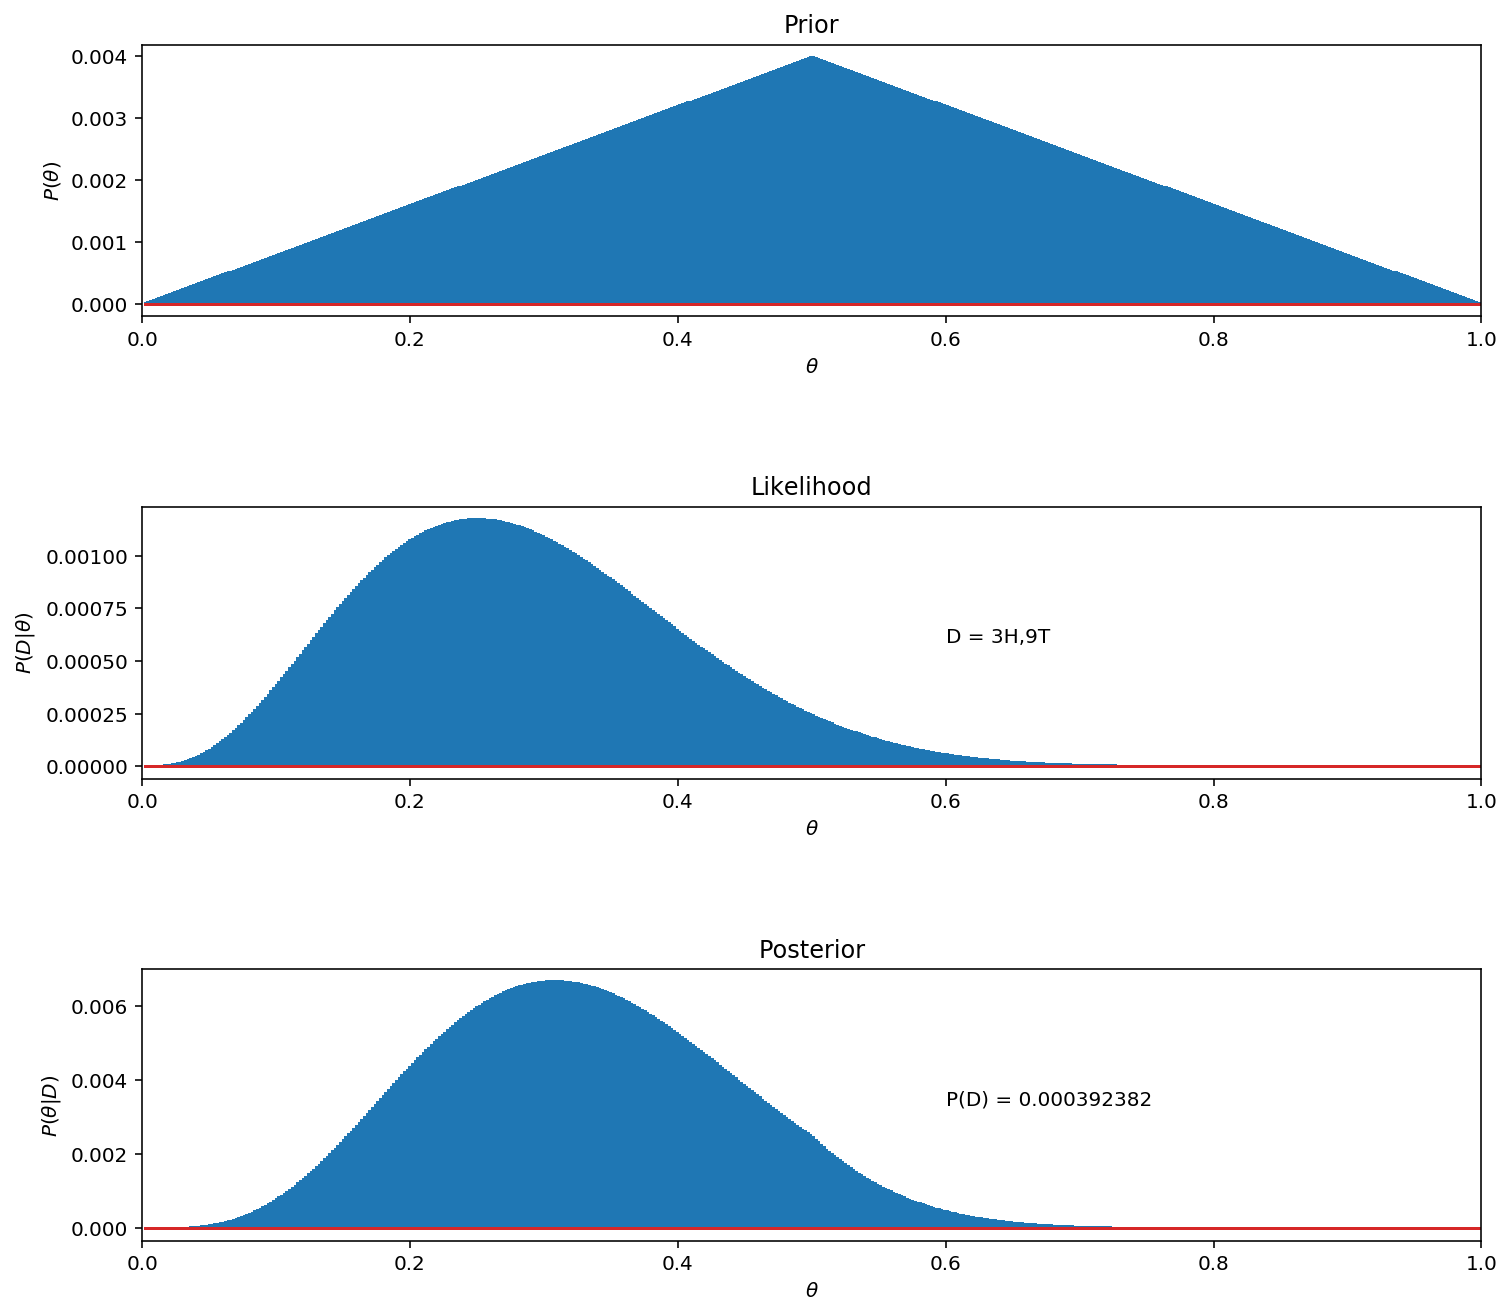

In [6]:
plot_results()

We can see from the above that when our prior is triangular and our likelihood is skewed, our posterior distribution is also skewed - but is shifted toward the prior. We can also change the sample size to show how this impacts the posterior.

/Users/sergiynokhrin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.
/Users/sergiynokhrin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/Users/sergiynokhrin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a L

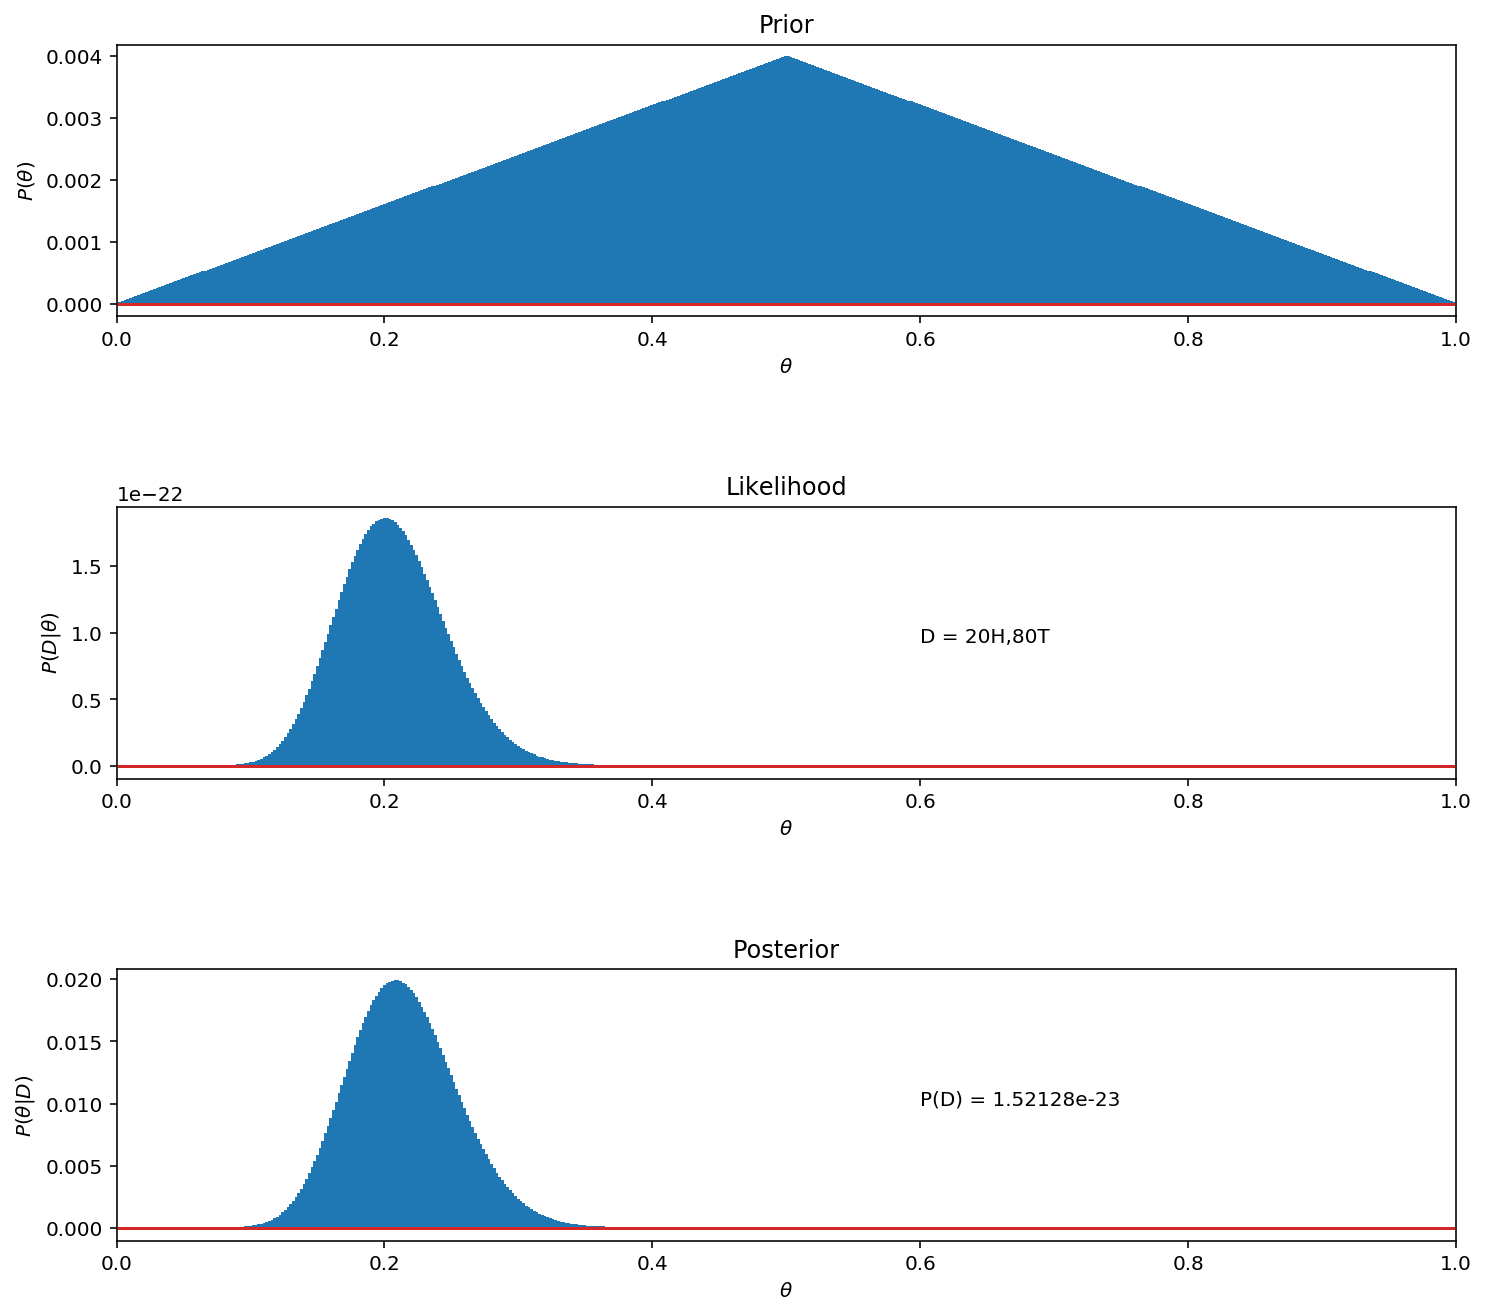

In [7]:
# Change sample size
data = np.repeat([1, 0], [20, 80])
n_heads = np.sum(data)
n_tails = len(data) - n_heads

# Compute the likelihood of the data for each value of theta:
p_data_given_theta = theta**n_heads * (1-theta)**n_tails

# Compute the posterior:
p_data = np.sum(p_data_given_theta * p_theta)
p_theta_given_data = p_data_given_theta * p_theta / p_data

plot_results()

With a larger sample size, the likelihood and hence the posterior distributions are both sharper. A larger sample size dilutes the prior.

Furthermore, a *flat prior* (i.e., without any information) will yield a posterior distribution equal to the likelihood function:

/Users/sergiynokhrin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.
/Users/sergiynokhrin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/Users/sergiynokhrin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a L

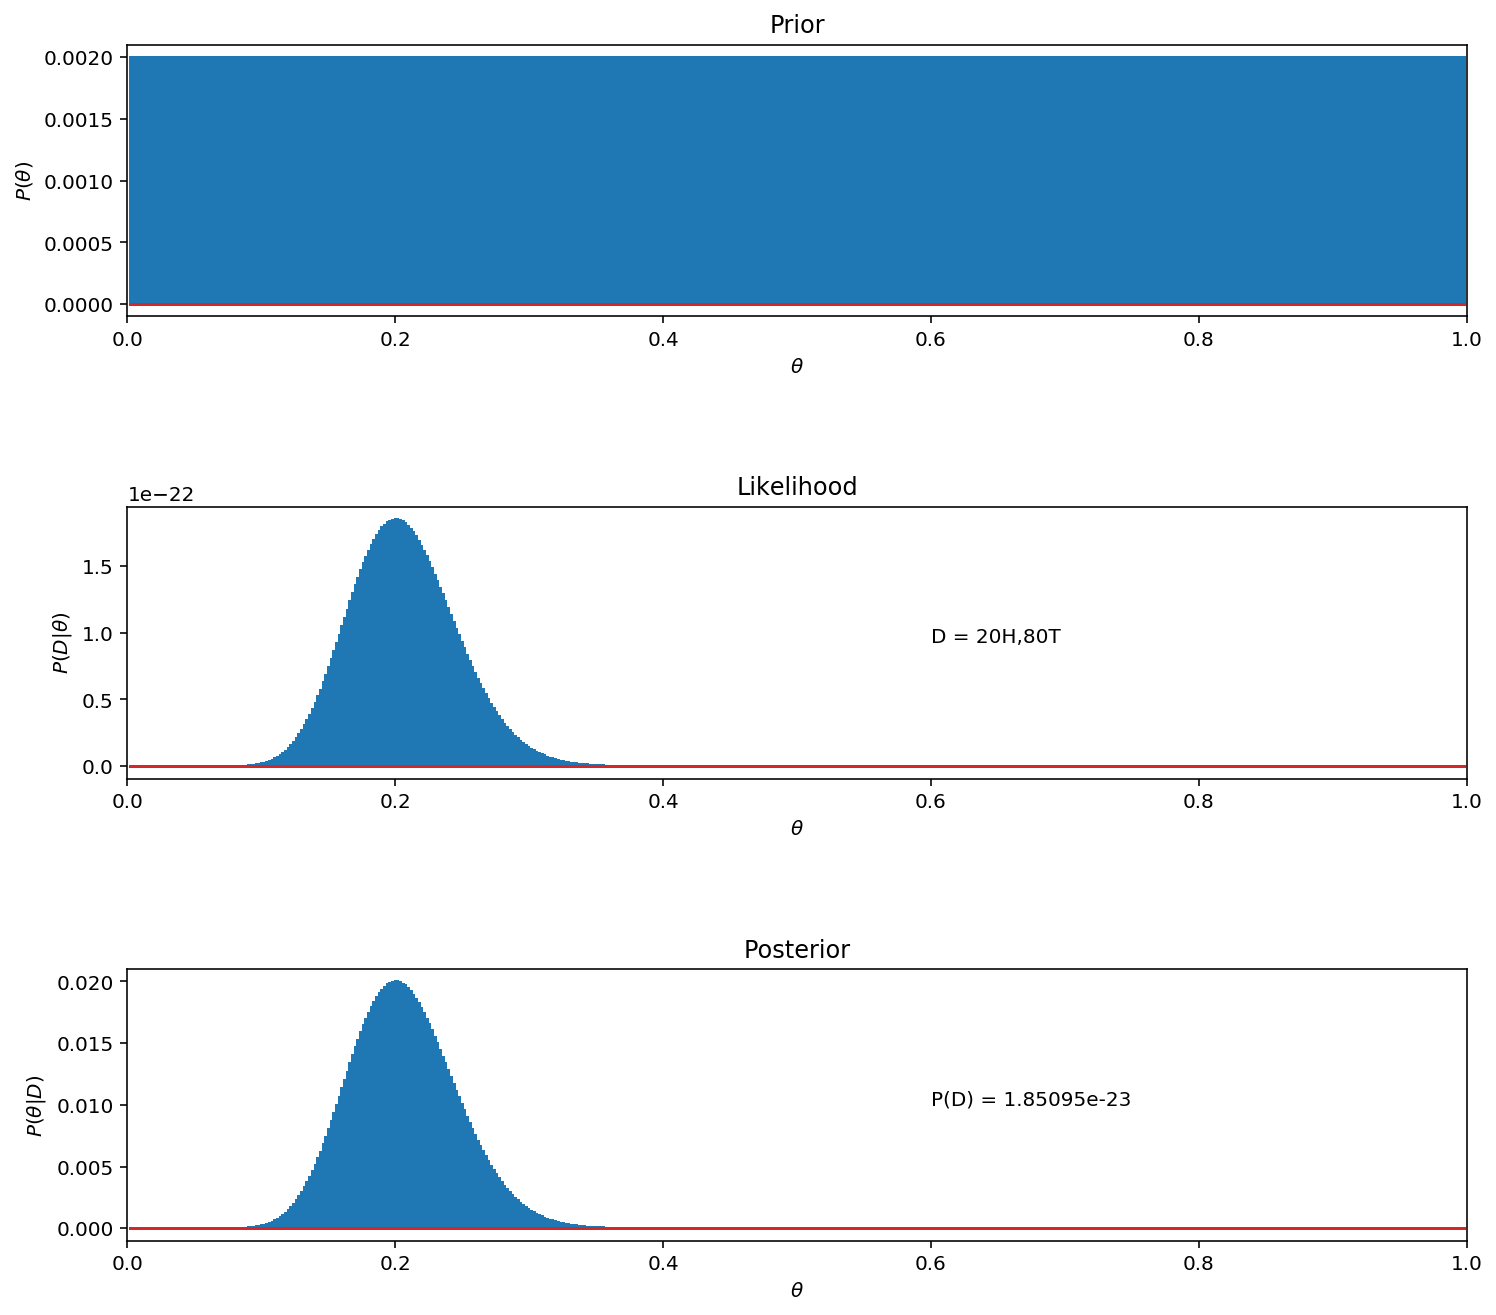

In [8]:
# p_theta is the vector of prior probabilities on the theta values.
p_theta = np.repeat(1/n_theta_vals, n_theta_vals)  # Makes a flat belief distribution.
p_theta = p_theta / np.sum(p_theta)     # Makes sure that beliefs sum to 1.

# Compute the posterior:
p_data = np.sum(p_data_given_theta * p_theta)
p_theta_given_data = p_data_given_theta * p_theta / p_data

plot_results()

The above plots demonstrate that the shape of the posterior is governed by the combination of the prior and the likelihood. Increasing the sample size reduces the influence of the prior on the posterior because the likelihood function tends to be sharper, giving it more influence. The more data you have, the less you have to rely on your priors.

Thus, given a strong prior, a large data sample is required for the posterior to change - because you need a lot of data to change your prior beliefs.

However, a prior without information will produce a posterior with the same shape as that of the likelihood function.

#### EXERCISE 1

Assume that the bias of the mint $\omega$ is distributed with $A_\omega = B_\omega = 2$. Allow $K$ to equal 5. We flip the coin ten times, and record the following results:

$y$: H H T H T H H H H T

Complete the code below to estimate and plot the posterior probability of the bias of the coin $\theta$, given the bias of the mint $\omega$ and the data $y$. Check out <a href="http://cmdlinetips.com/2018/03/probability-distributions-in-python/">this page</a> to help you understand how to construct probability distributions.

In [9]:
import scipy.stats as stats
from scipy.stats import bernoulli
from scipy.stats import beta

#### EXERCISE 1: SOLUTION

In [10]:
# Here, we have to build a hierarchical model introducing a distribution for omega that will drive the distribution of theta.
# omega is the vector (list) of candidate values for the parameter omega.
# n_omega_vals is the number of candidate theta values.

# We set n_omega_vals to 500 here:

K = 5
n_omega_vals = 500

omega_n = np.linspace(1/(n_omega_vals+1), n_omega_vals/(n_omega_vals+1), n_omega_vals)

# We shall use beta distribution for omega.

P_omega = beta.pdf(omega_n, 2, 2)

# Now as a prior we shall have 100 distributions for theta, one for each value of omega,
# this prior will be represented by matrix:

n_theta_vals = 500 

theta_n = np.linspace(1/(n_theta_vals+1), n_theta_vals / (n_theta_vals+1), n_theta_vals)

prior_matrix = [];

# by looping over omega values, we shall populate prior_matrix:
for val in omega_n:
    prior_matrix.append(beta.pdf(theta_n, val * (K - 2) + 1, (1 - val) * (K - 2) + 1))


In the example above, we used beta distribution for the $\theta$ and generated 100 distributuions assuming dependence on $\omega$ in the following form:  $\omega(K-2)+1$ and $(1-\omega)(K-2)+1$. So far, we have a list of arrays, which can be converted to a Numpy matrix. After this conversion, each element of the list will become a row of the matrix, in other words, each row represents a theta distribution. However, for later calculations, it would be more convenient to have the theta distributions in columns. Thus, we shall transpose the matrix.

In [11]:
theta_given_omega_matrix = np.array(prior_matrix).transpose()

This matrix may be mutliplied by the distribution of $\omega$ values stored in the array P_omega, in other words, through multiplication by $P(\omega)$ we will weigh each column by its corresponding probability of observing. This will produce the complete prior probability of the form $P(\theta | \omega) P(\omega)$:

In [12]:
comp_prior_matrix = theta_given_omega_matrix * P_omega

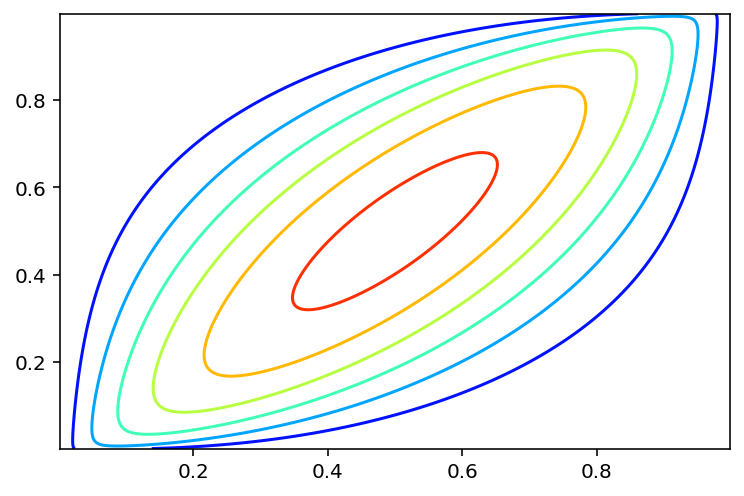

In [13]:
# let's see the contour plot of prior distribution

plt.contour(omega_n, theta_n, comp_prior_matrix, alpha=1.0, cmap=plt.cm.jet)

In [14]:
# The next step is to find the likelihood, the probility of observing data depends only on theta,
# and the likelihood of observing 7 Heads and 3 Tails is 

P_Data_given_Theta = theta_n**7 * (1-theta_n)**3

In [15]:
# the final step is to multiply likelihood by prior to find posterior probability:

P_Theta_Omega_given_Data = (P_Data_given_Theta * comp_prior_matrix.transpose()).transpose()

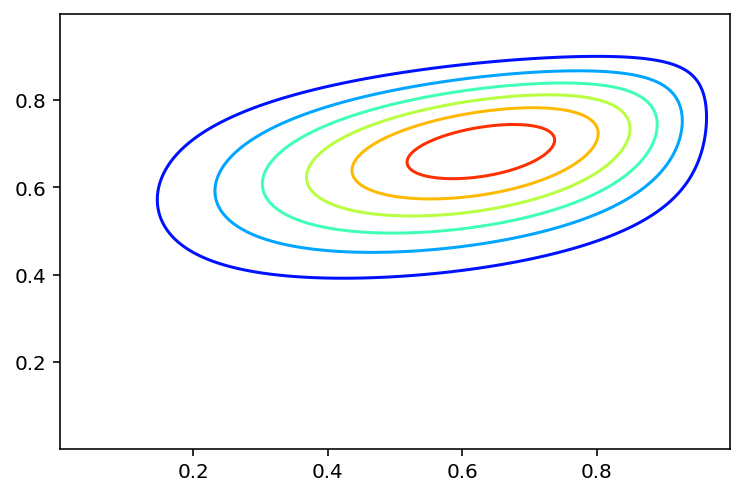

In [16]:
# Let's inspect the posterior:

plt.contour(omega_n, theta_n, P_Theta_Omega_given_Data, alpha=1.0, cmap=plt.cm.jet)

#### Multiple coins from a single mint

Now let us extend our problem to several coins from the same mint. We model each coin as having its own distinct bias $\theta_s$, so we are estimating a distinct parameter for each coin, and using all of the data to estimate $\omega$.

Similar to what we saw before, the outcome of each individual coin flip can be modelled as follows:
    
$$y_{i\mid s} \sim \textrm{dbern}(\theta_s)$$

where the subscript $i\mid s$ denotes the $i$th observation for coin $s$.

And $\theta_s$ can be modelled as:

$$\theta_s \sim \textrm{dbeta}(\omega(K-2)+1,(1-\omega)(K-2)+1)$$

with $K$ constant.

If there are $S$ coins, there are $S+1$ parameters, because $\omega$ is a parameter:

$$\theta_1 ... \theta_S, \omega$$

Graphically:

![hierarch_3.png](attachment:hierarch_3.png "hierarch multiple coins")

(source: Kruschke, J.K., "Doing Bayesian Data Analysis", 2nd. ed., 2015, pp. 231)

Image description: four panels. The top panel shows a curve, the word 'beta' and the letters $A_\omega$ and $B_\omega$, representing a beta distribution and its parameters. Black and grey vertical arrows to equations in the second panel shows that this is the distribution that describes $\omega$.

The second panel shows a curve, the word 'beta' and two equations: $\omega(K-2)+1$ and $(1-\omega)(K-2)+1$, with each $\omega$ pointed to by one of the above arrows. [N.B., the grey arrow just means that the $\omega$ it points to is the same dependence as the $\omega$ pointed to by the arrow in black.] A black vertical arrow to the third panel labelled with the letter $s$ shows that this is the distribution that describes each $\theta_s$.

The third panel shows two vertical bars and the word 'Bernoulli', representing a Bernoulli distribution. Another black vertical arrow to the bottom panel shows that this is the distribution that describes our trial labelled $i \mid s$, which informs our data $y_{i \mid s}$ (bottom panel).
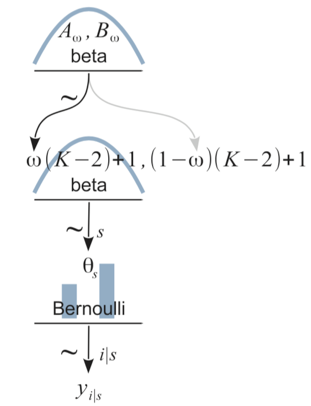

Suppose, for example, that we only have two coins from the same mint. We want to estimate their biases $\theta_1$ and $\theta_2$, and simultaneously estimate $\omega$. Below is a sample prior distribution with a weak dependence of $\theta$ on $\omega$ (i.e., when $K$ is small; $K = 5$ in this case):

![hierarch_4.png](attachment:hierarch_4.png "Prior from two coins")

(source: Kruschke, J.K., "Doing Bayesian Data Analysis", 2nd. ed., 2015, pp. 232)

Image description: five graph panels in two rows, three on the top and two on the bottom. The top three have $\omega$ on the vertical axis, and $\theta1$, $\theta2$ and $p(\omega)$ on the horizontal axis, respectively. The first two show contour plots demonstrating a weak dependence of $\theta$ on $\omega$ demonstrated by shallow curves, while the third displays a curve showing that it is a beta distribution.

The bottom two panels depict shallow curves showing the relationship between $\theta_1$ vs. $p(\theta_1)$ and $\theta_2$ vs. $p(\theta_2)$.
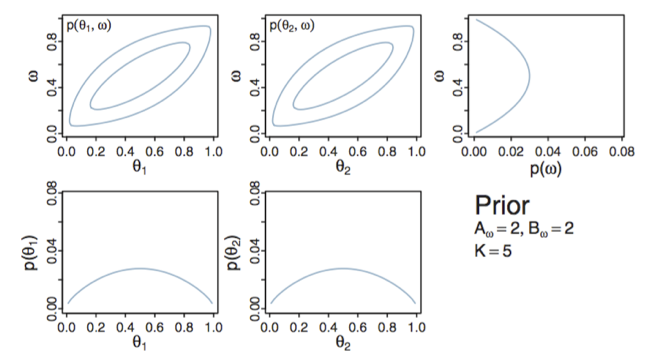

The parameter space of the full prior joint distribution is 3D (because it is over three parameters: $\theta_1$, $\theta_2$, and $\omega$), and the prior probability at point $\langle \omega, \theta_1, \theta_2 \rangle$ is $p(\theta_1 \mid \omega) \cdot p(\theta_2 \mid \omega) \cdot p(\omega)$, normalizing by summing over the grid and dividing by the total.

To show this better on the page, the figure above shows various 2D marginal distributions; on the top row, the marginals over $\theta_1$ and $\theta_2$ show the weak dependence on $\omega$, whereas the marginal over $p(\omega)$ shows that is has the shape of a beta(2,2) distribution.

The likelihood function for the data shows 3 heads out of 15 flips of coin 1, and 2 heads out of 5 flips of coin 2. Note that the contours are parallel to the $\omega$ axis, implying no dependence of the likelihood on $\omega$, and also that they are more tightly grouped for coin 1 than coin 2, because we have more data for coin 1 (15 vs. 5 flips).

![hierarch_5.png](attachment:hierarch_5.png "Likelihood two coins")

(source: Kruschke, J.K., "Doing Bayesian Data Analysis", 2nd. ed., 2015, pp. 232)

Image description: two graph panels showing $\theta_1$ vs. $\omega$ and $\theta_2$ vs. $\omega$ in the form of vertical lines. The lines are tightly grouped on the left of the first panel and less tightly grouped on he right of the second panel.
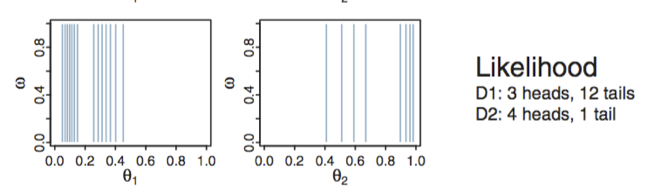

Finally, the posterior distributions for this case are shown below. The posteriors for $\theta_1$ and $\theta_2$ are centered around 3/15 = 0.2 and 4/5 = 0.8, respectively, with the marginal posterior for $\theta_1$ having lower uncertainty than that for $\theta_2$. Note that the marginal posterior on $\omega$, on the right, is fairly broad.

![hierarch_6.png](attachment:hierarch_6.png "posterior two coins")

(source: Kruschke, J.K., "Doing Bayesian Data Analysis", 2nd. ed., 2015, pp. 232)

Image description: five graph panels in two rows, three on the top and two on the bottom. The top three have $\omega$ on the vertical axis, and $\theta1$, $\theta2$ and $p(\omega \mid D)$ on the horizontal axis, respectively. The first two show contour plots with the contour lines grouped more strongly on the left in panel 1 and less strongly on the right in panel 2. Panel 3 shows a broad curve.

The bottom two panels depict slightly sharper curves than in the prior showing the relationship between $\theta_1$ vs. $p(\theta_1 \mid D)$ and $\theta_2$ vs. $p(\theta_2 \mid D)$. These show how the combination of the prior and likelihood inform the posterior.
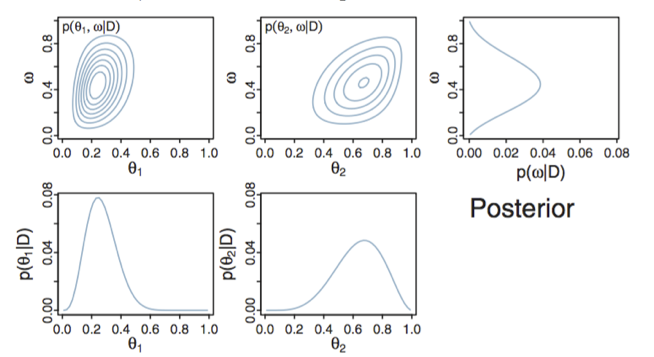

In contrast, when $K$ is large, the prior dependency of $\theta_s$ on $\omega$ is much stronger. For example, you can see this in the top two rows when $K = 75$:

![hierarch_7.png](attachment:hierarch_7.png "Data from two coins K=75")
Image description: ten graph panels in four rows, exactly as in the previous three images. This time the first two  contour plots demonstrate a strong dependence of $\theta$ on $\omega$ demonstrated by a straighter line, while the third, fourth, and fifth, sixth, and seventh (the rest of the priors and the likelihood function) are the same as above.

The next two panels show contour plots with much more tightly grouped contour lines closer to each other in each panel. Panel 3 shows a sharp curve. The bottom two panels now depict sharper curves showing the relationship between $\theta_1$ vs. $p(\theta_1)$ and $\theta_2$ vs. $p(\theta_2)$.
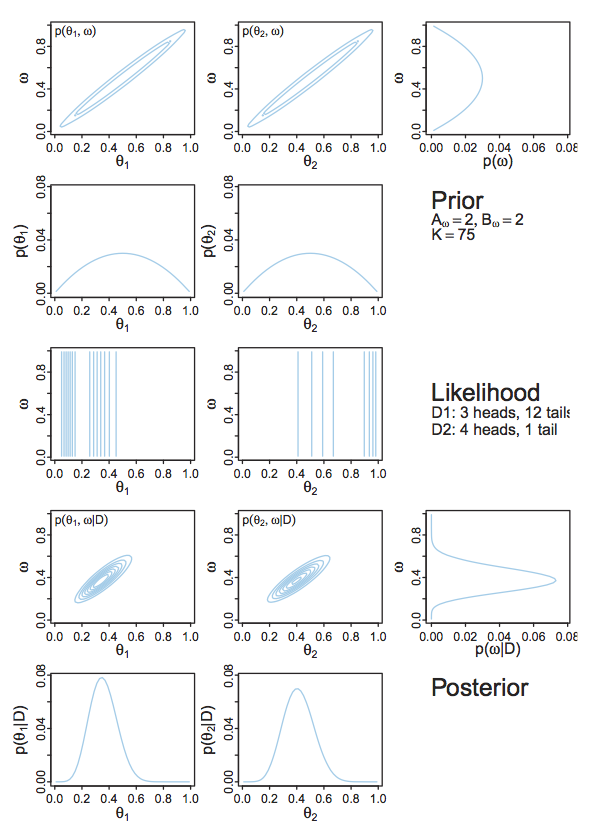

The likelihood (row 3) doesn't change, but the posteriors on $\theta_1$ and $\theta_2$ on the bottom row are much more strongly influenced by each other's data. They are also sharper than in the previous example (especially $\theta_2$), showing that the range of possible values for $\theta_1$ and $\theta_2$ is tighter.

Taking this back to our coin example: when $K$ is large, the coins from each mint have a $\theta_s$ that is much more consistently close to $\omega$, so $p(\theta_1 \mid D)$ is much closer to $p(\theta_2 \mid D)$ for large $K$ than for small $K$.

#### SUMMARY

Hierarchical models can be useful in a variety of domains. In finance, perhaps you want to look at he bottom line of companies in particular countries grouped by sector, or in business, perhaps the grouping of employee satisfaction by business division and subdivision. What these examples have in common is that all the parameters that are measured depend on a chain of other parameters stretching as far as you wish to investigate. If you have parameter variation at different levels of the model that aids in the prediction of your dependent variable once these parameters are optimized, a hierarchical model can be very powerful.

A cautionary note: the statistician George Box had the following remark attributed to him: "All models are wrong; some models are useful". While hierarchical models might be appropriate to help answer some kinds of questions, they will not be appropriate for all of them. So when these types of models are great for when you have data that are naturally structured into a hierarchy (e.g., country, state, county), or a longitudinal analysis with many measurements over time (e.g., a biological response to a drug dose, where you might have a group mean on one level and individual differences on another), they might not be appropriate for other problems, such as when your data are not structured or when you have too many non-predictive terms. Adding extra terms when they don't provide much information can lead to degradation in the predictive ability of your model.

For example, when modelling a coin flip, is it relevant to include whether it was flipped with the left or right hand? Does that depend on whether the coin flipper is left or right handed? All of these effects can be modelled, but the amount of information they give your model might not be worth the time and effort used to create the model, and may even make it worse if their variance is too high.

Also it is important to note that such models are very useful for estimating the predictive effects of different levels, but they are not necessarily good with inferring causation. You must take care when using these models that you do not infer contextual effects that do not actually exist.

**EXERCISE 2**

Consider the scenario of *two* coin factories, each with their own biases, $\omega_1$ and $\omega_2$, the first of which is tail-biased and the second of which is head-biased. We flip a coin that we know is from one of the two factories, but not which factory. The prior probabilities of the factories are 50/50. The results show 7 head in 10 flips.

**A)** If $\omega_1 = 0.25$, $\omega_2 = 0.75$, and $\kappa = 6$, what are the posterior probabilities of the factories?

**B)** If $\omega_1 = 0.25$, $\omega_2 = 0.75$, and $\kappa = 202$, what are the posterior probabilities of the factories?

**C)** Why are the posterior probabilities of the factories above so different, even though the modes of the factories are the same?

In [ ]:
from scipy.special import betaln

# HINT: the marginal likelihood (the denominator of Bayes' rule) is defined as:
def marginal_likelihood(z,N,a,b):
    return np.exp(betaln(z+1,N-z+b) - betaln(a,b))          
               
# Specify parameter values of the factories:
omega1 = 
omega2 = 
kappa = 

# Compute corresponding a,b values:
a1 = 
b1 = 
a2 = 
b2 = 

# Specify the data:
z = 
N = 

# Compute the marginal likelihoods:
pD_given_1 = marginal_likelihood(z,N,a1,b1)
pD_given_2 = marginal_likelihood(z,N,a2,b2)

# Compute the Bayes factor:
BF12 = pD_given_1/pD_given_2

# Specify prior probabilities:
p1 = 
p2 = 

# Compute posterior probabilities:
BF12xPriorOdds = (pD_given_1/pD_given_2)*(p1/p2)
p1_given_D = BF12xPriorOdds/(1.0+BF12xPriorOdds)
p2_given_D = 1.0-p1_given_D

**EXERCISE 2: SOLUTION**

In [18]:
from scipy.special import betaln

# HINT: the marginal likelihood (the denominator of Bayes' rule) is defined as:
def marginal_likelihood(z,N,a,b):
    return np.exp(betaln(z+a,N-z+b) - betaln(a,b))          
               
# Specify parameter values of the factories:
omega1 = 0.25
omega2 = 0.75
kappa = 202 # 6 for 2A, 202 for 2B

# Compute corresponding a,b values:
a1 = omega1*(kappa-2) + 1
b1 = (1-omega1)*(kappa-2) + 1
a2 = omega2*(kappa-2) + 1
b2 = (1-omega2)*(kappa-2) + 1

# Specify the data:
z = 7
N = 10

# Compute the marginal likelihoods:
pD_given_1 = marginal_likelihood(z,N,a1,b1)
pD_given_2 = marginal_likelihood(z,N,a2,b2)

# Compute the Bayes factor:
BF12 = pD_given_1/pD_given_2

# Specify prior probabilities:
p1 = 0.5
p2 = 1-p1

# Compute posterior probabilities:
BF12xPriorOdds = (pD_given_1/pD_given_2)*(p1/p2)
p1_given_D = BF12xPriorOdds/(1.0+BF12xPriorOdds)
p2_given_D = 1.0-p1_given_D

**A)**

In [19]:
# kappa = 6
p1_given_D = 0.14150943396226423
p2_given_D = 0.8584905660377358

**B)**

In [20]:
# kappa = 202
p1_given_D = 0.0003137382044470833
p2_given_D = 0.9996862617955529

**C)**

In both cases, the head-biased factory (model 2) is favored because the data showed more heads than tails. But the data are more decisive in the second part (when $\kappa = 202$) because the factories make more consistently distinctive coins. In **B)** ($\kappa=202$), coins from the first factory have biases always near 0.25 and coins from the second factory have biases always near 0.75. But in **A)** ($\kappa=6$), coins from the first factory have biases that could be far from 0.25, even head biased, and coins from the second factory have biases that could be far from 0.75, even tail biased. In the scenario of Part **A)**, data such as $z=7$,$N=10$ could have come from either factory with reasonably high probability, but in the scenario of Part **B)**, it's relatively unlikely that the data could have come from the tail-biased factory.

**You have reached the end of this module.** 

If you have any questions, please reach out to your peers using the discussion boards. If you and your peers are unable to come to a suitable conclusion, do not hesitate to reach out to your instructor on the designated discussion board.

*When you are comfortable with the content, and have practiced to your satisfaction, you may proceed to any related assignments.*